# Dataset generation

## 1. Import

In [11]:
import numpy as np
import networkx as nx
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

## 2. Utils

In [12]:
def draw(graph, ax):
    """
    Draws the graph as a matplotlib plot.
    Depots are colored in red. Edges that have been
    traveresed
    """

    # draw nodes according to color and position attribute
    pos = nx.get_node_attributes(graph, "coordinates")
    nx.draw_networkx_nodes(
        graph, pos, ax=ax, node_size=100
    )


    labels_pos = {k: (v + np.array([0, 0.03])) for k, v in pos.items()}
    nx.draw_networkx_labels(
        G, labels_pos, ax=ax
    )

def generate_graph(num_nodes):
    G = nx.complete_graph(n)
    node_position = {
        i: coordinates for i, coordinates in enumerate(np.random.rand(num_nodes, 2))
    }
    nx.set_node_attributes(G, node_position, "coordinates")

    return G

## 3. Generating Distance Matrices

In [13]:
n = 4
G = nx.complete_graph(n)
node_position = {
    i: coordinates for i, coordinates in enumerate(np.random.rand(n, 2))
}
nx.set_node_attributes(G, node_position, "coordinates")

positions = np.array([node_position[index] for index in range(n)])
distances = (10000*cdist(positions, positions)).astype(int)

In [14]:
#X = X.reshape((N,M*M))

## 4. Building Solutions

In [15]:
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

# Distance callback


def create_distance_callback(dist_matrix):
    # Create a callback to calculate distances between cities.

    def distance_callback(from_node, to_node):
        return int(dist_matrix[from_node][to_node])

    return distance_callback


def main():
    # Distance matrix
    dist_matrix = distances

    tsp_size = n
    num_vehicles = 1
    depot = 0

    # Create routing model
    if tsp_size > 0:
        manager = pywrapcp.RoutingIndexManager(tsp_size, num_vehicles, depot)
        routing = pywrapcp.RoutingModel(manager)
        search_parameters = pywrapcp.DefaultRoutingSearchParameters()
        search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
        # Create the distance callback.
        dist_callback = create_distance_callback(dist_matrix)
        transit_callback_index = routing.RegisterTransitCallback(dist_callback)
        routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
        # Solve the problem.
        assignment = routing.SolveWithParameters(search_parameters)
        if assignment:
            # Solution distance.
            print("Total distance: " +
                  str(assignment.ObjectiveValue()) + " miles\n")
            # Display the solution.
            # Only one route here; otherwise iterate from 0 to routing.vehicles() - 1
            route_number = 0
            # Index of the variable for the starting node.
            index = routing.Start(route_number)
            route = ''
            while not routing.IsEnd(index):
                # Convert variable indices to node indices in the displayed route.
                route += str(index) + ' -> '
                index = assignment.Value(routing.NextVar(index))
            route += str(depot)
            print("Route:\n\n" + route)
        else:
            print('No solution found.')
    else:
        print('Specify an instance greater than 0.')

main()

Total distance: 0 miles

Route:

0 -> 2 -> 6 -> 1 -> 8 -> 7 -> 5 -> 4 -> 9 -> 3 -> 0


In [16]:
distances

array([[   0, 6118, 5730, 4523, 4363, 5402, 1770, 5479, 6101, 2952],
       [6118,    0,  865, 6292, 9905, 8732, 4400, 8707, 6074, 7666],
       [5730,  865,    0, 6532, 9297, 7936, 3967, 7905, 5208, 7575],
       [4523, 6292, 6532,    0, 8545, 9880, 4636, 9947, 9664, 2939],
       [4363, 9905, 9297, 8545,    0, 3694, 5656, 3834, 6964, 5989],
       [5402, 8732, 7936, 9880, 3694,    0, 5584,  140, 3875, 8114],
       [1770, 4400, 3967, 4636, 5656, 5584,    0, 5621, 5085, 4174],
       [5479, 8707, 7905, 9947, 3834,  140, 5621,    0, 3773, 8211],
       [6101, 6074, 5208, 9664, 6964, 3875, 5085, 3773,    0, 9024],
       [2952, 7666, 7575, 2939, 5989, 8114, 4174, 8211, 9024,    0]])

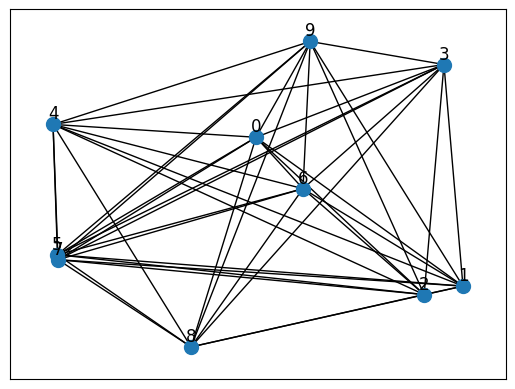

In [17]:
fig, ax = plt.subplots()
draw(G, ax)

## 5. Add K edges to the nearest nodes

In [18]:
edges = []
for i in range(n):
    partition = np.argsort(distances[i])
    idx = partition[1:3]
    edges.append(idx)
G.add_edges_from(edges)

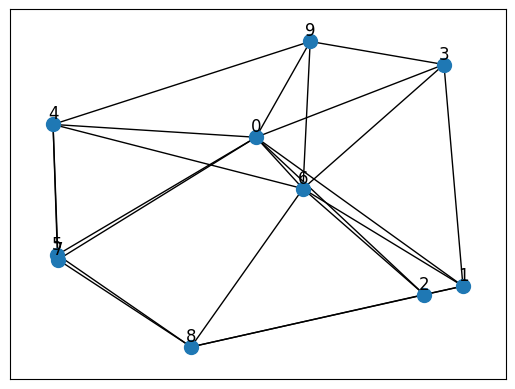

In [19]:
fig, ax = plt.subplots()
draw(G,ax)